### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from collections import Counter



In [2]:
df = pd.read_csv("dataset.csv")
data = df.copy()
data.head()

,Job,Company,City,Work Type,Work Model,Salary,Experience Level,Skills
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,NaN,"Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,NaN,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale..."
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf..."
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,Associate,"Decision Trees, Linear Regression, Python, Sup..."
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا..."


### 2. Data Cleaning

#### Handling missing values

In [3]:
#Handling missing values
missing_values = data.isnull().sum()
total_missing = missing_values.sum()
total_cells = np.product(data.shape)
percent_missing = (total_missing/total_cells)*100
print(missing_values)
print("Percentage of missing values:",percent_missing)

Job                   0
Company               0
City                  0
Work Type             9
Work Model           29
Salary              257
Experience Level     70
Skills                8
dtype: int64
Percentage of missing values: 18.1420233463035


In [4]:
#remove column salary because its empty
data.drop(columns=["Salary"], inplace=True)#True means drop original dataframe, False return new dataframe without modifying new dataframe

#### Filling in missing values

In [5]:
#Work Type
work_type_choices = ["Full-time", "Part-time", "Associate", "Internship", "Contract", "Temporary"]
data["Work Type"].fillna(np.random.choice(work_type_choices) ,inplace=True)

#Work Model
work_model_choices = ["Hybrid", "On-site", "Remote"]
data["Work Model"].fillna(np.random.choice(work_model_choices) ,inplace=True)

#Experience level
seniority_level_choices = ["Mid-Senior", "Entry level", "Director", "Executive"]
data["Experience Level"].fillna(np.random.choice(seniority_level_choices) ,inplace=True)

#Skills
skills_choices = ["Python, C, SQL and Java", "Data Analytics, Big Data, English, Machine Learning and SQL","Apache Kafka, Apache Spark, Mongodb and project managment","MERN stack, Next.js, Express, Mongodb"]
data["Skills"].fillna(np.random.choice(skills_choices) ,inplace=True)

print(data.isnull().sum())


Job                 0
Company             0
City                0
Work Type           0
Work Model          0
Experience Level    0
Skills              0
dtype: int64


### 3. Exploring Data

#### Number of jobs collected

In [6]:
nb_jobs = data.shape[0]
print("Number of jobs:",nb_jobs)

Number of jobs: 257


#### Top hiring Cities 

In [7]:
lst = []
for i in range(0,257):
        cities = data['City'][i].replace(',',' ').replace('-',' ').replace('Mechouar','Casablanca').replace('Prefecture','Casablanca').replace('Sidi','Sidi_Ifni').replace('Agdal','Rabat').replace('Dar','Casablanca').replace('Aîn','Casablanca').replace('Fès','Fez').split(' ')
        lst.append(cities[0])
        i+=1

count_cities = Counter(lst)
unique_cities = list(count_cities.items())
cnames = []
ccount = []
for j in range(0,11):
        city_name = unique_cities[j][0]
        city_count = unique_cities[j][1]
        cnames.append(city_name)
        ccount.append(city_count)
print(cnames)
print(ccount)

['Casablanca', 'Rabat', 'Fez', 'Morocco', 'Temara', 'Marrakesh', 'Tangier', 'Agadir', 'Sidi_Ifni', 'Dakhla', 'Meknes']
[156, 66, 4, 12, 1, 9, 5, 1, 1, 1, 1]


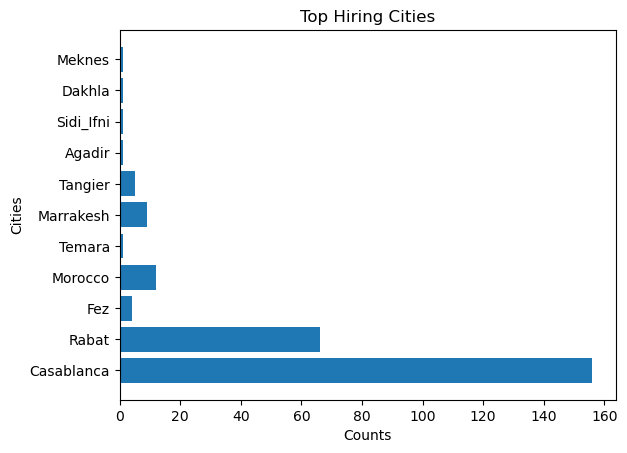

In [8]:
fig,ax = plt.subplots()
ax.barh(cnames, width=ccount)
plt.xlabel("Counts")
plt.ylabel("Cities")
plt.title("Top Hiring Cities")
plt.show()

<font color=sky-blue>Interpretation</font><br>
Casablanca and Rabat offer more jobs opportunities compared to other cities.

#### Most model work In demand(Full-time, Part-time etc)

In [9]:
#Replace some of work type with NaN
l = ["Mid-Senior level","Entry level","Associate","Director"]
data['Work Type']=data['Work Type'].replace(l, np.nan)
data['Work Type'].value_counts()

Work Type
Full-time     202
Contract       13
Internship      8
Part-time       6
Temporary       1
Name: count, dtype: int64

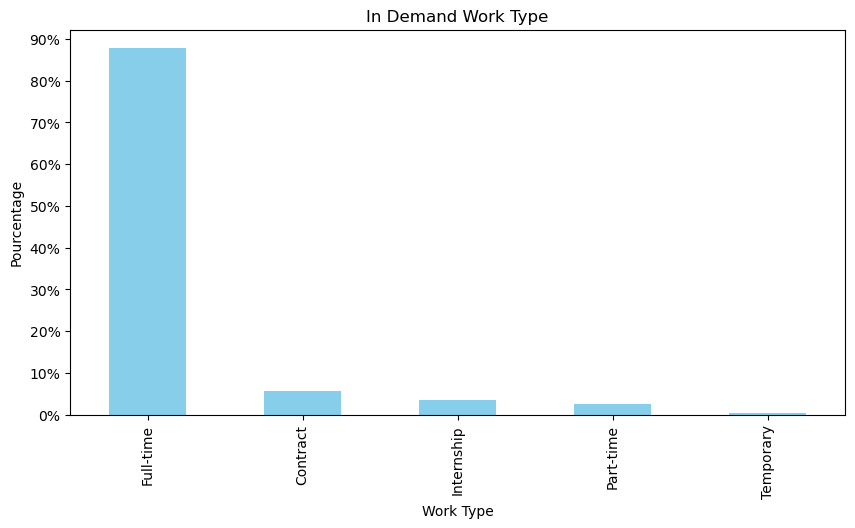

In [10]:
type_jobs = data['Work Type'].value_counts()
len_jobs = type_jobs.sum()
ax = type_jobs.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Type")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Type")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_jobs,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_jobs))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Full-time jobs are high demand types of work.

#### Analysing Work Model(Remote, on-site, hybride)

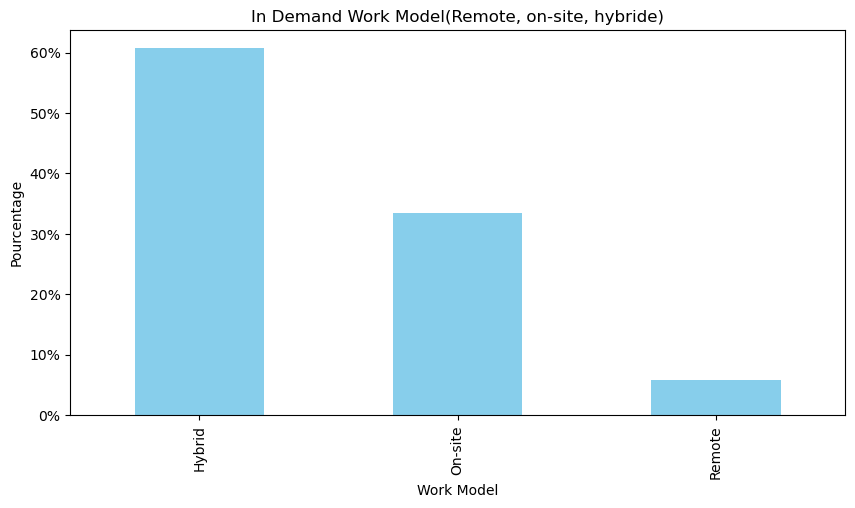

In [11]:
model_work = data['Work Model'].value_counts()
len_work_model = model_work.sum()
ax = model_work.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Model")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Model(Remote, on-site, hybride)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_work_model,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_work_model))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Hybride type of work is the most demanded in job markets.

#### Analysing Seniority Level(Mid-Senior level, Associate, Entry level etc)

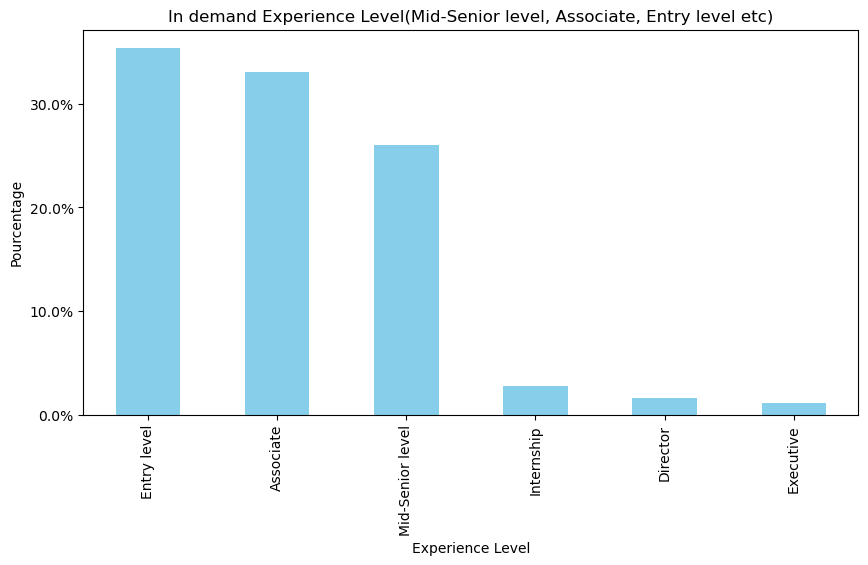

In [13]:
seniority = data['Experience Level'].value_counts()
len_seniority = seniority.sum()
ax = seniority.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Experience Level")
plt.ylabel("Pourcentage")
plt.title("In demand Experience Level(Mid-Senior level, Associate, Entry level etc)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_seniority,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_seniority))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Associate work dominates other experience levels.

#### Analysing Companies 

In [14]:
data['Company'].value_counts()

Company
CGI                                                  17
Deloitte                                             14
Orange Business Maroc                                12
SQLI                                                 10
Société Générale - Africa Technologies & Services    10
                                                     ..
BCG Platinion                                         1
JESA S.A                                              1
CREDIT DU MAROC                                       1
MAROCLEAR                                             1
Avito.ma - Frontier Digital Ventures                  1
Name: count, Length: 89, dtype: int64

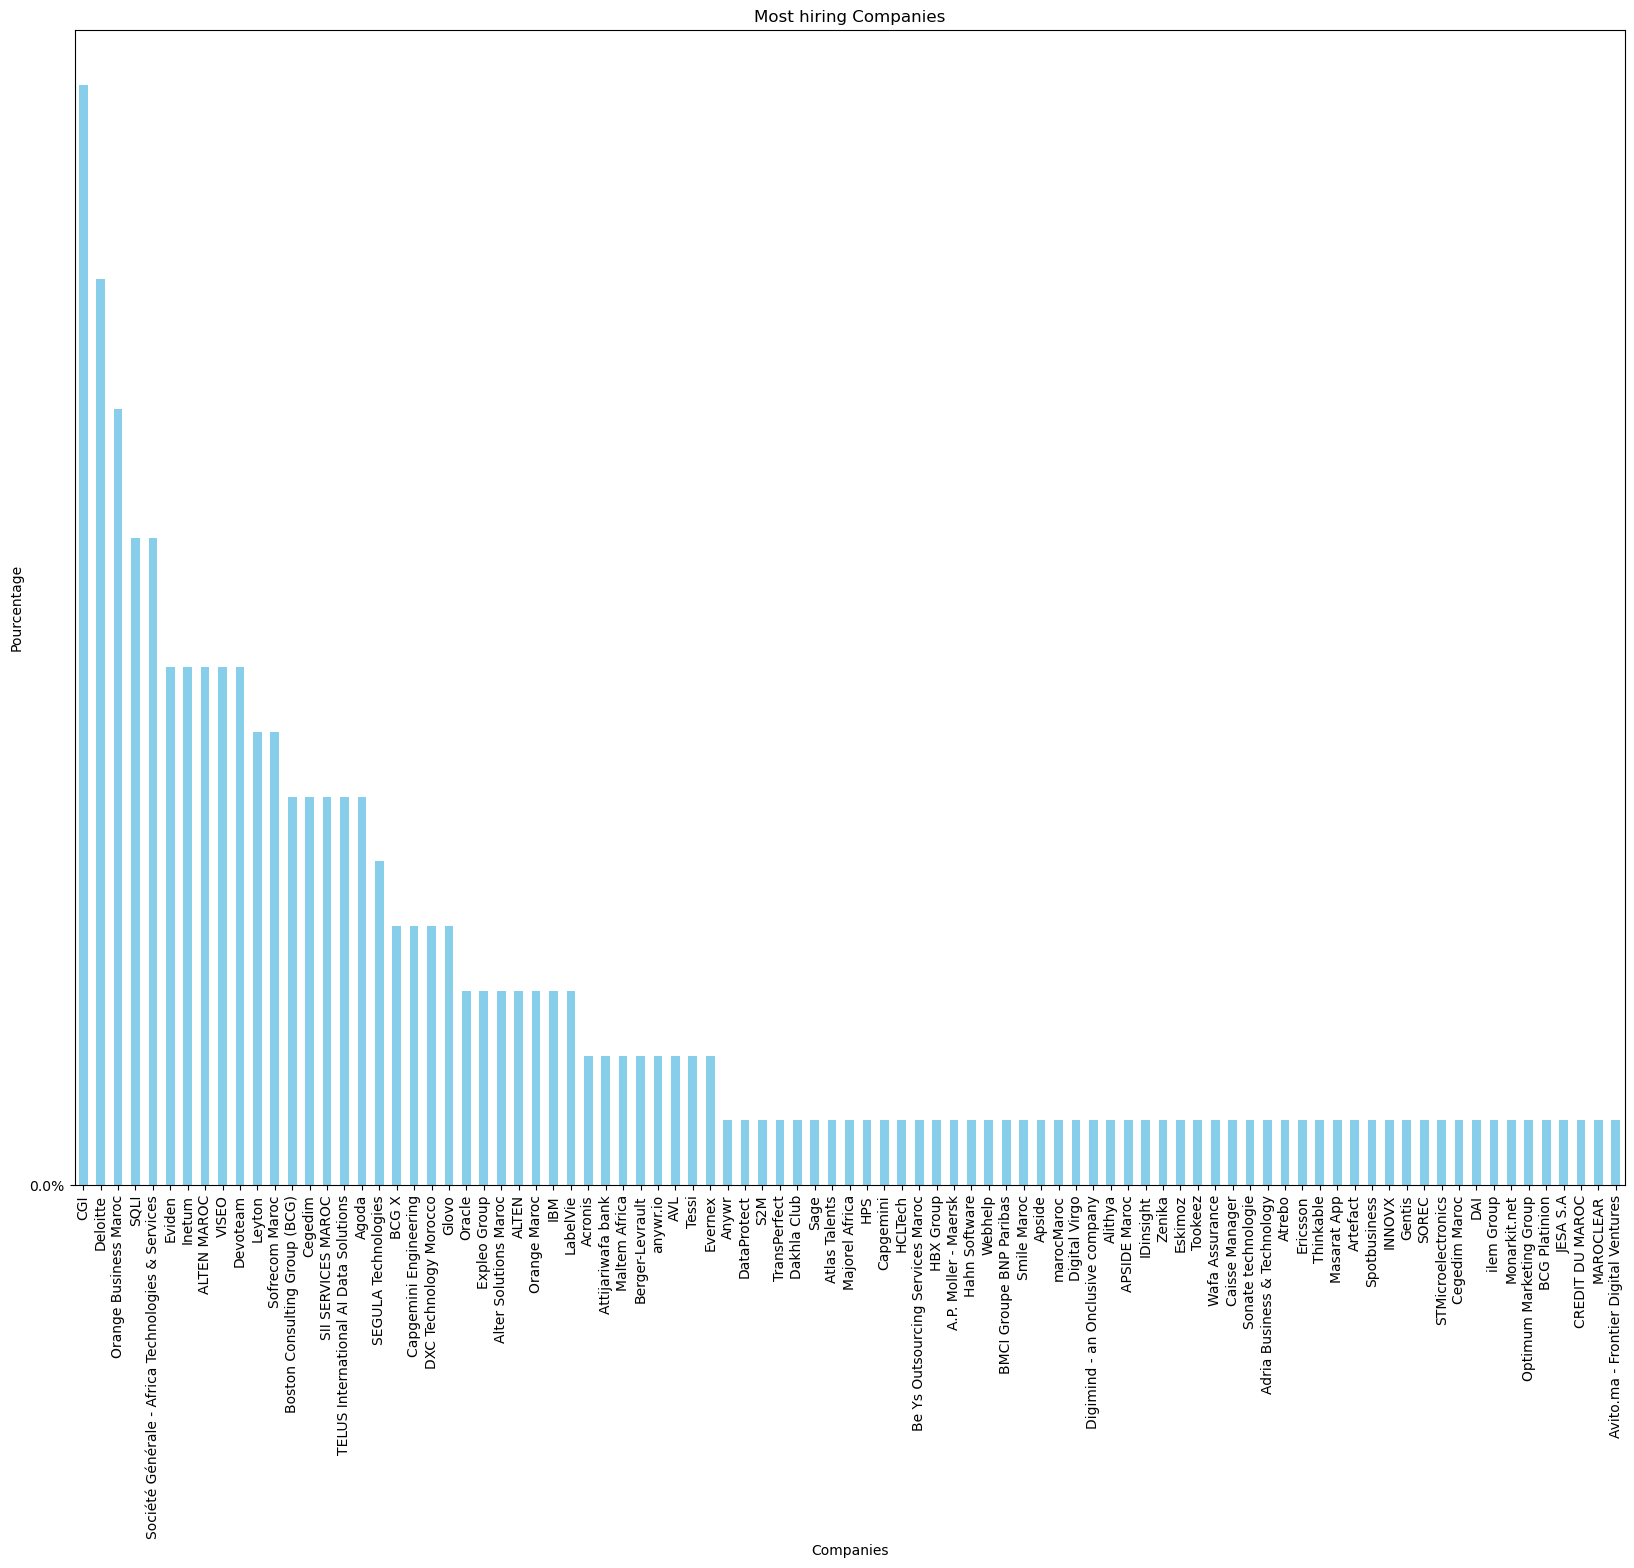

In [15]:
companies = data['Company'].value_counts()
len_companies = companies.sum()
ax = companies.plot(kind='bar', figsize=(20,15),  color='skyblue')
plt.xlabel("Companies")
plt.ylabel("Pourcentage")
plt.title("Most hiring Companies")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_companies,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_companies))
plt.show()

<font color=sky-blue>Interpretation</font><br>


#### In demand Programming langages 

Text Pre-processing

In [15]:
from nltk.corpus import stopwords

#remove punctuations
import string
data['Skills'] = ["".join(char for char in skill if char not in string.punctuation) for skill in data['Skills']]

#lowercase
data['Skills'] = data['Skills'].apply(lambda x : " ".join(x.lower() for x in x.split()))

#remove stop words
stopwords = stopwords.words('english')
data["Skills"] = data["Skills"].apply(lambda x : " ".join(x for x in x.split() if x not in stopwords))

#lemmitazing

#get data
data["Skills"]


0      coaching dwh etl esprit microsoft business int...
1      crm microsoft excel powerpoint python salesfor...
2      apache kafka apache spark google cloud platfor...
3      decision trees linear regression python suppor...
4      php الإنجليزية الاتصالات ثنائية اللغة التواصل ...
                             ...                        
252    apache kafka apache spark mongodb project mana...
253    apache kafka apache spark mongodb project mana...
254    apache kafka apache spark mongodb project mana...
255    apache kafka apache spark mongodb project mana...
256    apache kafka apache spark mongodb project mana...
Name: Skills, Length: 257, dtype: object

In [16]:
#Translate Arabic skills into English
from googletrans import Translator
translator = Translator()
for i in range(len(data["Skills"])):
    skills = data["Skills"][i]
    words = skills.split()
    translated_words = []
    for word in words:
        translation = translator.translate(word, src='ar', dest='en')
        translated_words.append(translation.text)
translated_line = ', '.join(translated_words)
print(translated_line)


Count Vectorization


In [ ]:
#Word count


<font color=sky-blue>Interpretation</font><br>


#### Most Job titles in demand

<font color=sky-blue>Interpretation</font><br>
